In [49]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

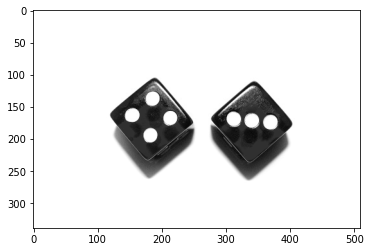

In [50]:
original_img = cv2.imread('input/1.jpg')
gray_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')

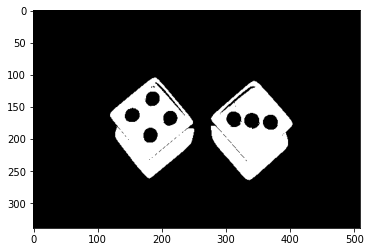

In [51]:
thresh = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 99, 10)
# thresh = 255 - thresh

plt.imshow(thresh, cmap='gray')

2


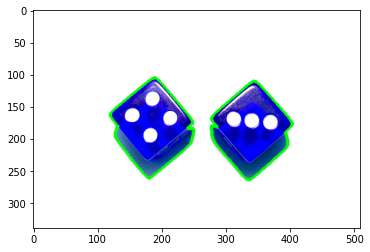

In [52]:
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print(len(contours))

detected_dice = original_img.copy()
for c in contours:
    cv2.drawContours(detected_dice, c, -1, (0, 255, 0), 4)
    
plt.imshow(detected_dice)


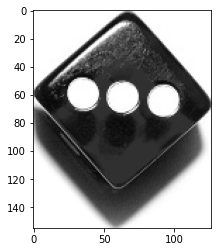

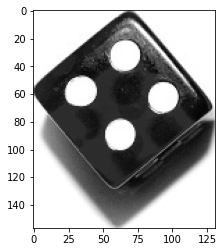

In [53]:
dices = []
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    new_dice = gray_img[y:y+h, x:x+w]
    dices.append(new_dice)
    plt.imshow(new_dice, cmap='gray')
    plt.show()

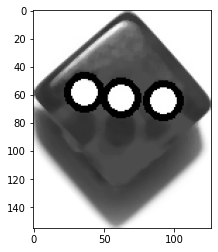

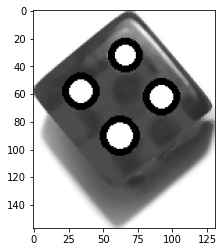

In [54]:
circles_in_dice_1 = cv2.HoughCircles(dices[0], cv2.HOUGH_GRADIENT, 1, 20, param1=40, param2=30, minRadius=10, maxRadius=20)
circles_in_dice_1 = np.uint8(np.round(circles_in_dice_1[0, :]))
dices[0] = cv2.medianBlur(dices[0], 5)
c1 = 0
for c in circles_in_dice_1:
    x, y, radius = c[0], c[1], c[2]
    cv2.circle(dices[0], (x, y), radius, (0, 255, 0), 4)
    c1 += 1

dices[1] = cv2.medianBlur(dices[1], 5)
c2 = 0
circles_in_dice_2 = cv2.HoughCircles(dices[1], cv2.HOUGH_GRADIENT, 1, 10, param1=40, param2=30, minRadius=10, maxRadius=20)
circles_in_dice_2 = np.uint8(np.round(circles_in_dice_2[0, :]))
for c in circles_in_dice_2:
    x, y, radius = c[0], c[1], c[2]
    cv2.circle(dices[1], (x, y), radius, (0, 255, 0), 4)
    c2 += 1
    
plt.imshow(dices[0], cmap='gray')
plt.show()

plt.imshow(dices[1], cmap='gray')
plt.show()

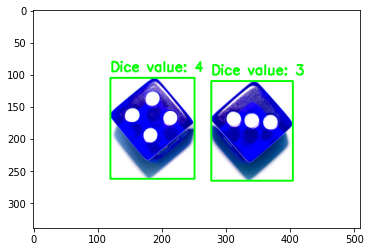

In [55]:
for i in range(len(contours)):
    x, y, w, h = cv2.boundingRect(contours[i])
    cv2.rectangle(original_img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    if i == 0:
        cv2.putText(original_img, f"Dice value: {c1}", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
    else:
        cv2.putText(original_img, f"Dice value: {c2}", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

plt.imshow(original_img)